In [16]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'400',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'df98fb63-82d5-4d2b-8358-5a15ec5ec41a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-04T08:28:31.935Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 2, 'notice': None, 'total_count': 9012}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10485, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
type(data)


dict

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
#normalize data
df = pd.json_normalize(data['data'])
df["timestamp"] = pd.to_datetime('now')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3593022609.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950368e+07,1.950368e+07,False,NaN,1,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,2.747080e+04,1.126496e+10,-33.5975,0.212558,-0.560664,4.756223,5.731771e+00,-5.279145,-1.085416e+01,5.357815e+11,49.4911,5.768867e+11,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
1,1027,Ethereum,ETH,ethereum,7480,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202418e+08,1.202418e+08,True,NaN,2,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,1.645536e+03,5.223249e+09,-29.5789,0.171115,-1.299173,3.467428,4.239797e-01,-9.957549,-1.459152e+01,1.978623e+11,18.2750,1.978623e+11,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
2,825,Tether USDt,USDT,tether,63120,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336509e+10,8.642571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,9.999834e-01,2.775593e+10,-15.5414,0.002123,0.005047,0.031115,3.439069e-02,0.156360,-2.716604e-02,8.336371e+10,7.7011,8.642428e+10,NaN,2023-10-04T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-04 08:29:57.279895
3,1839,BNB,BNB,bnb,1656,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538462e+08,1.538462e+08,False,NaN,4,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,2.124613e+02,3.396926e+08,-14.8948,0.187286,-1.491367,0.030586,-1.043091e+00,-11.808565,-1.197591e+01,3.268638e+10,3.0177,3.268638e+10,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
4,52,XRP,XRP,xrp,1105,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,5.292020e-01,1.672425e+09,89.2056,0.020574,3.548517,6.159683,4.766402e+00,-15.056186,1.067105e+01,2.821301e+10,2.6058,5.292020e+10,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
5,3408,USDC,USDC,usd-coin,14307,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.532041e+10,2.532041e+10,False,NaN,6,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,1.000017e+00,2.571216e+09,-32.6860,0.009331,0.005516,-0.023607,3.800700e-03,0.007552,-1.412848e-02,2.532084e+10,2.3377,2.532084e+10,NaN,2023-10-04T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-04 08:29:57.279895
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.134385e+08,5.589837e+08,True,NaN,7,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,2.336218e+01,6.329564e+08,2.8635,1.128937,-2.876686,23.489748,1.780834e+01,2.890914,1.930046e+01,9.658824e+09,0.8923,1.305908e+10,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.513840e+10,3.622901e+10,False,NaN,8,NaN,NaN,NaN,2023-10-04T08:26:00.000Z,2.567602e-01,1.641988e+08,-19.5133,-0.003271,-2.761287,4.978910,-3.091255e-01,-11.637008,-1.086432e+01,9.022145e+09,0.8335,1.155421e+10,NaN,2023-10-04T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:29:57.279895
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.0

In [19]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
     'start':'1',
     'limit':'15',
     'convert':'USD'
    }
    headers = {
     'Accepts': 'application/json',
     'X-CMC_PRO_API_KEY': 'df98fb63-82d5-4d2b-8358-5a15ec5ec41a',
    } 

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
        
    df = pd.json_normalize(data['data'])
    df["timestamp"] = pd.to_datetime('now')
    df    
    
    
    if not os.path.isfile(r'C:\Users\Admin\Desktop\Data Analyst\API.csv'):
        df.to_csv(r'C:\Users\Admin\Desktop\Data Analyst\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Admin\Desktop\Data Analyst\API.csv', mode = 'a', header = False)

In [20]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)#stop in 1 minute
exit()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3899644250.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3899644250.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3899644250.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3899644250.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_13800\3899644250.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [21]:
df72 = pd.read_csv(r'C:\Users\Admin\Desktop\Data Analyst\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.950368e+07,1.950368e+07,False,NaN,1,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,27455.211578,1.128552e+10,-34.0994,0.059497,-0.471483,4.695091,5.680121,-5.325934,-10.897124,5.354775e+11,49.4643,5.765594e+11,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
1,1,1027,Ethereum,ETH,ethereum,7480,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202418e+08,1.202418e+08,True,NaN,2,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1645.019882,5.231304e+09,-29.7721,0.112881,-1.224381,3.439680,0.339423,-10.017718,-14.675195,1.978002e+11,18.2701,1.978002e+11,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
2,2,825,Tether USDt,USDT,tether,63120,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.336509e+10,8.642571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1.000033,2.771654e+10,-15.7505,0.009122,0.003669,0.069754,0.050442,0.159279,-0.017078,8.336788e+10,7.6995,8.642860e+10,NaN,2023-10-04T08:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-04 08:14:08.376777
3,3,1839,BNB,BNB,bnb,1656,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538462e+08,1.538462e+08,False,NaN,4,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,212.291675,3.396092e+08,-16.1842,0.089507,-1.501781,-0.201375,-1.121191,-11.899627,-12.035731,3.266028e+10,3.0163,3.266028e+10,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
4,4,52,XRP,XRP,xrp,1105,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,0.530512,1.664329e+09,87.1224,0.330911,3.955778,6.280233,5.148556,-14.799756,10.950784,2.828284e+10,2.6124,5.305118e+10,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
5,5,3408,USDC,USDC,usd-coin,14307,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.532041e+10,2.532041e+10,False,NaN,6,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1.000039,2.572824e+09,-33.0057,0.008431,0.003108,0.007693,0.012455,0.010529,0.001652,2.532141e+10,2.3386,2.532141e+10,NaN,2023-10-04T08:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-04 08:14:08.376777
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.134385e+08,5.589837e+08,True,NaN,7,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,23.218920,6.312721e+08,2.4937,0.311161,-2.957330,22.612229,17.137740,2.225115,18.627499,9.599596e+09,0.8866,1.297900e+10,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
7,7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.513840e+10,3.622901e+10,False,NaN,8,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,0.256415,1.643894e+08,-19.9901,-0.220363,-2.640642,4.771051,-0.421002,-11.767641,-11.038875,9.010015e+09,0.8321,1.153868e+10,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
8,8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-exch

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19503675.00000,19503675.00000,False,NaN,1,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,27455.21158,11285516654.97806,-34.09940,0.05950,-0.47148,4.69509,5.68012,-5.32593,-10.89712,535477523669.24121,49.46430,576559443133.35999,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
1,1,1027,Ethereum,ETH,ethereum,7480,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120241846.70434,120241846.70434,True,NaN,2,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1645.01988,5231304228.55345,-29.77210,0.11288,-1.22438,3.43968,0.33942,-10.01772,-14.67519,197800228534.69183,18.27010,197800228534.69000,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
2,2,825,Tether USDt,USDT,tether,63120,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83365093032.00954,86425711834.22702,True,NaN,3,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1.00003,27716538156.01469,-15.75050,0.00912,0.00367,0.06975,0.05044,0.15928,-0.01708,83367875501.88715,7.69950,86428596458.13000,NaN,2023-10-04T08:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-04 08:14:08.376777
3,3,1839,BNB,BNB,bnb,1656,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153846241.37094,153846241.37094,False,NaN,4,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,212.29168,339609162.09097,-16.18420,0.08951,-1.50178,-0.20137,-1.12119,-11.89963,-12.03573,32660276286.98600,3.01630,32660276286.99000,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
4,4,52,XRP,XRP,xrp,1105,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53312364216.00000,99988397127.00000,False,NaN,5,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,0.53051,1664329106.71131,87.12240,0.33091,3.95578,6.28023,5.14856,-14.79976,10.95078,28282836091.86293,2.61240,53051175853.45000,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
5,5,3408,USDC,USDC,usd-coin,14307,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25320406436.27260,25320406436.27260,False,NaN,6,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,1.00004,2572823537.88088,-33.00570,0.00843,0.00311,0.00769,0.01246,0.01053,0.00165,25321406224.51794,2.33860,25321406224.52000,NaN,2023-10-04T08:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-04 08:14:08.376777
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,413438522.27769,558983703.79299,True,NaN,7,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,23.21892,631272114.56361,2.49370,0.31116,-2.95733,22.61223,17.13774,2.22512,18.62750,9599596070.19334,0.88660,12978998030.16000,NaN,2023-10-04T08:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-04 08:14:08.376777
7,7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35138403980.62500,36229014789.87600,False,NaN,8,NaN,NaN,NaN,2023-10-04T08:12:00.000Z,0.25642,164389380.27319,-19.99010,-0.22036,-2.64064,4.77105,-0.42100,-11.76764,-11.03887,9010015249.21047,0.83210,11538676783.33000,NaN,2023-10-04T08:12:00.0

In [39]:
# Now let's look at the coin trends over time
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20391,-0.52682,4.77740,5.73166,-5.27772,-10.85171
Ethereum,0.16188,-1.27317,3.46443,0.40079,-9.97911,-14.59563
Tether USDt,0.00383,0.00803,0.06477,0.03886,0.15351,-0.01106
BNB,0.21607,-1.45276,0.01257,-1.03492,-11.80304,-11.97279
XRP,0.09706,3.66362,6.30936,4.80046,-14.97018,10.75278
USDC,0.00578,0.00887,0.00258,0.00619,0.00686,0.00024
Solana,1.15868,-2.99718,23.60437,17.80658,2.89815,19.25072
Cardano,0.04125,-2.66762,5.03070,-0.24484,-11.60625,-10.84215
Dogecoin,0.09726,-1.50597,1.05170,-3.40797,-18.79818,-9.77095


In [40]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.20391
             quote.USD.percent_change_24h    -0.52682
             quote.USD.percent_change_7d      4.77740
             quote.USD.percent_change_30d     5.73166
             quote.USD.percent_change_60d    -5.27772
             quote.USD.percent_change_90d   -10.85171
Ethereum     quote.USD.percent_change_1h      0.16188
             quote.USD.percent_change_24h    -1.27317
             quote.USD.percent_change_7d      3.46443
             quote.USD.percent_change_30d     0.40079
             quote.USD.percent_change_60d    -9.97911
             quote.USD.percent_change_90d   -14.59563
Tether USDt  quote.USD.percent_change_1h      0.00383
             quote.USD.percent_change_24h     0.00803
             quote.USD.percent_change_7d      0.06477
             quote.USD.percent_change_30d     0.03886
             quote.USD.percent_change_60d     0.15351
             quote.USD.percent_change_90

In [41]:
# Checking type of data frame
type(df4)

pandas.core.series.Series

In [42]:
# Exchange df4 into df5 
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.20391
            quote.USD.percent_change_24h  -0.52682
            quote.USD.percent_change_7d    4.77740
            quote.USD.percent_change_30d   5.73166
            quote.USD.percent_change_60d  -5.27772
            quote.USD.percent_change_90d -10.85171
Ethereum    quote.USD.percent_change_1h    0.16188
            quote.USD.percent_change_24h  -1.27317
            quote.USD.percent_change_7d    3.46443
            quote.USD.percent_change_30d   0.40079
            quote.USD.percent_change_60d  -9.97911
            quote.USD.percent_change_90d -14.59563
Tether USDt quote.USD.percent_change_1h    0.00383
            quote.USD.percent_change_24h   0.00803
            quote.USD.percent_change_7d    0.06477
            quote.USD.percent_change_30d   0.03886
            quote.USD.percent_change_60d   0.15351
            quote.USD.percent_change_90d  -0.01106
BNB         quote.USD.percent_change_1h    0.21607
            quote.USD.percent_change_24h  -1.45276
            quote.USD.percent_change_7d    0.01257
            quote.USD.percent_change_30d  -1.03492
            quote.USD.percent_change_60d -11.80304
            quote.USD.percent_change_90d -11.97279
XRP         quote.USD.percent_change_1h    0.09706
            quote.USD.percent_change_24h   3.66362
            quote.USD.percent_change_7d    6.30936
            quote.USD.percent_change_30d   4.80046
            quote.USD.percent_change_60d -14.97018
            quote.USD.percent_change_90d  10.75278
USDC        quote.USD.percent_change_1h    0.00578
            quote.USD.percent_change_24h   0.00887
            quote.USD.percent_change_7d    0.00258
            quote.USD.percent_change_30d   0.00619
            quote.USD.percent_change_60d   0.00686
            quote.USD.percent_change_90d   0.00024
Solana      quote.USD.percent_change_1h    1.15868
            quote.USD.percent_change_24h  -2.99718
            quote.USD.percent_change_7d   23.60437
            quote.USD.percent_change_30d  17.80658
            quote.USD.percent_change_60d   2.89815
            quote.USD.percent_change_90d  19.25072
Cardano     quote.USD.percent_change_1h    0.04125
            quote.USD.percent_change_24h  -2.66762
            quote.USD.percent_change_7d    5.03070
            quote.USD.percent_change_30d  -0.24484
            quote.USD.percent_change_60d -11.60625
            quote.USD.percent_change_90d -10.84215
Dogecoin    quote.USD.percent_change_1h    0.09726
            quote.USD.percent_change_24h  -1.50597
            quote.USD.percent_change_7d    1.05170
            quote.USD.percent_change_30d  -3.40797
            quote.USD.percent_change_60d -18.79818
            quote.USD.percent_change_90d  -9.77095
TRON        quote.USD.percent_change_1h    0.27137
            quote.USD.percent_change_24h   1.40480
            quote.USD.percent_change_7d    5.07930
            quote.USD.percent_change_30d  15.81285
            quote.USD.percent_change_60d  16.96724
            quote.USD.percent_change_90d  14.33331
Toncoin     quote.USD.percent_change_1h   -0.24608
            quote.USD.percent_change_24h  -1.07440
            quote.USD.percent_change_7d   -3.60060
            quote.USD.percent_change_30d   7.05252
            quote.USD.percent_change_60d  68.37608
            quote.USD.percent_change_90d  45.55163
Dai         quote.USD.percent_change_1h    0.02999
            quote.USD.percent_change_24h   0.01637
            quote.USD.percent_change_7d    0.07812
            quote.USD.percent_change_30d   0.02515
            quote.USD.percent_change_60d   0.08208
            quote.USD.percent_change_90d   0.02175
Polygon     quote.USD.percent_change_1h    1.13007
            quote.USD.percent_change_24h   2.10524
            quote.USD.percent_change_7d   13.86765
            quote.USD.percent_change_30d   5.53047
            quote.USD.percent_change_60d -12.97176
            quo

In [94]:
df5.count()

values    90
dtype: int64

In [43]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20391
1,Bitcoin,quote.USD.percent_change_24h,-0.52682
2,Bitcoin,quote.USD.percent_change_7d,4.77740
3,Bitcoin,quote.USD.percent_change_30d,5.73166
4,Bitcoin,quote.USD.percent_change_60d,-5.27772
5,Bitcoin,quote.USD.percent_change_90d,-10.85171
6,Ethereum,quote.USD.percent_change_1h,0.16188
7,Ethereum,quote.USD.percent_change_24h,-1.27317
8,Ethereum,quote.USD.percent_change_7d,3.46443
9,Ethereum,quote.USD.percent_change_30d,0.40079


In [44]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20391
1,Bitcoin,quote.USD.percent_change_24h,-0.52682
2,Bitcoin,quote.USD.percent_change_7d,4.77740
3,Bitcoin,quote.USD.percent_change_30d,5.73166
4,Bitcoin,quote.USD.percent_change_60d,-5.27772
5,Bitcoin,quote.USD.percent_change_90d,-10.85171
6,Ethereum,quote.USD.percent_change_1h,0.16188
7,Ethereum,quote.USD.percent_change_24h,-1.27317
8,Ethereum,quote.USD.percent_change_7d,3.46443
9,Ethereum,quote.USD.percent_change_30d,0.40079


In [45]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.20391
1,Bitcoin,24h,-0.52682
2,Bitcoin,7d,4.77740
3,Bitcoin,30d,5.73166
4,Bitcoin,60d,-5.27772
5,Bitcoin,90d,-10.85171
6,Ethereum,1h,0.16188
7,Ethereum,24h,-1.27317
8,Ethereum,7d,3.46443
9,Ethereum,30d,0.40079


In [35]:
# Import library to make graphs
import seaborn as sns
import matplotlib.pyplot as plt

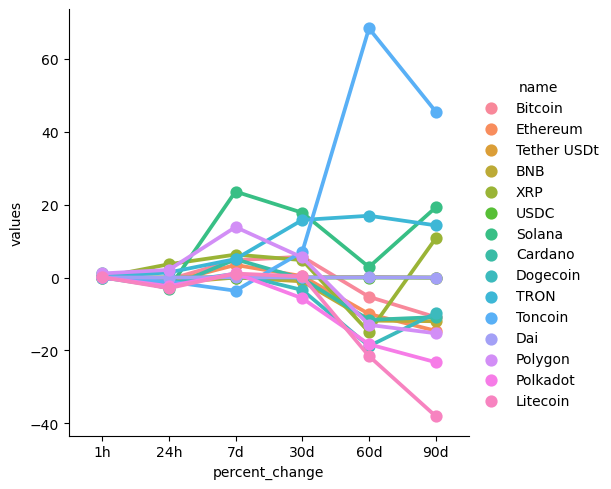

In [46]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [48]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27455.21158,2023-10-04 08:14:08.376777
15,Bitcoin,27480.13630,2023-10-04 08:30:14.774252
30,Bitcoin,27477.66249,2023-10-04 08:31:15.689822
45,Bitcoin,27482.73797,2023-10-04 08:32:16.657539
60,Bitcoin,27479.70249,2023-10-04 08:33:17.114325
75,Bitcoin,27474.16468,2023-10-04 08:34:17.964428


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

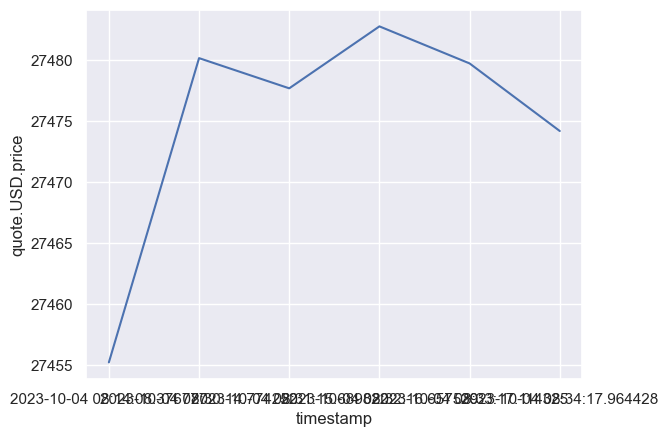

In [49]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)